# Bericht zu Versuch NN "Versuchstitel"

**Datum:** <2022-1M-DD>
 
 - **Student 1:** <vollständiger Name>
 - **Student 2:** <vollständiger Name>

## 1. Überblick

### Einführung

- Um was geht es in dem Versuch? Was ist das Ziel?

### 1.2 Zusammenfassung der Theorie

- Erläuterung der benutzten Formeln inkl. Variablenbeschriftung (Bsp. vom Vorversuch)
    - Darstellung z.B. durch "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" --> $$T=2\pi\sqrt{\frac{L}{g}}$$, wobei $T$ die Schinwungsdauer des Pendels für eine Oszillation, $L$ die Länge des Pendels und $g$ die Erdbeschleunigung.
    - $$\phi = A \exp(-\frac{\gamma t}{2})\cos(\omega t + \alpha)$$, wobei $\phi$ die Auslenkung der Schwingung, $A$ die ursprüngliche Amplitude der Schwingung, $\gamma$ der Reibungskoeffizient und $\omega$ die Kreisfrequenz.

### 1.3 Aufgaben

- Was sind die Aufgabenstellungen für den Versuch?

### 1.4 Umweltrelevanz

- Inwiefern ist der Versuch relevant für euer Studium in Umweltwissenschaften? (1-2 Sätze)

### 2. Messdaten

In [1]:
# Importieren der benutzten Packages

# Meist benötigt: 
import numpy as np  # Math
from uncertainties import ufloat # ufloat( , ) für die Fehlerrechnung
from uncertainties.umath import *  # Für Funktionen wie sin, cos

# Falls benutzt
# import pandas as pd # z.B. zum Importieren von Excel-Tabellen (csv-Files)
import matplotlib.pyplot as plt # Plotting
from matplotlib.pyplot import figure
# from uncertainties import unumpy # für uncertainties in arrays
# from scipy import linregress # Lineare regression

#### Einlesen und Darstellen der Messdaten (z.B. manuell oder aus CSV-, Excel-Dateien)

In [2]:
## Beispieldaten aus Vorversuch: Gravitationskonstante

# Pendellänge
L = ufloat(0.72, 0.02) # [m]

# Anzahl Oszillationen
n = 15

# Gemessene Zeit tn für diese Oszillationen
tn = ufloat(25, 0.5) # [s]

In [3]:
## Beispieldaten aus Vorversuch: Aufgabe 4

# Daten in csv-Datei
#table = pd.read_csv("messdaten/messdaten.csv") # Tabelle der Daten (in Pandas "data frame")
# Daten in Excel, Openoffice oder ähnlichem Format
#table = pd.read_excel("messdaten/messdaten.xls")

# Anzeige der Daten
#table  

## 3. Auswertung

#### Je nach Aufgabenstellung
- Graphische Darstellungen
- Berechnungen aller Resultate (inkl. Fehlerrechnung)
- Beantwortung der Aufgabenstellungen von 1.3.### 3.1 Abbildungen 

### Abhängigkeit der Elektron Reichweite von deren Energie

In [4]:
def range(E):
    '''
    Range of Electrons (beta-radiation) in Aluminium (mg/cm^(-2))
    as a function of the  energy  E (MeV) of the electron. 
    
    Referenz:
    Weber, Nuclear Instruments and Method 25 (1964) 261-264
    https://www.sciencedirect.com/science/article/pii/0029554X63901964?ref=cra_js_challenge&fr=RR-1
    '''
    a = 1.479e-3 # +- 0.0009 (MeV*cm^2/mg)
    A = 1/a
    B=0.9852     # +- 0.008
    C=3.73       # +- 0.12  (MeV^(-1))
    return A*E*(1-B/(1+C*E))

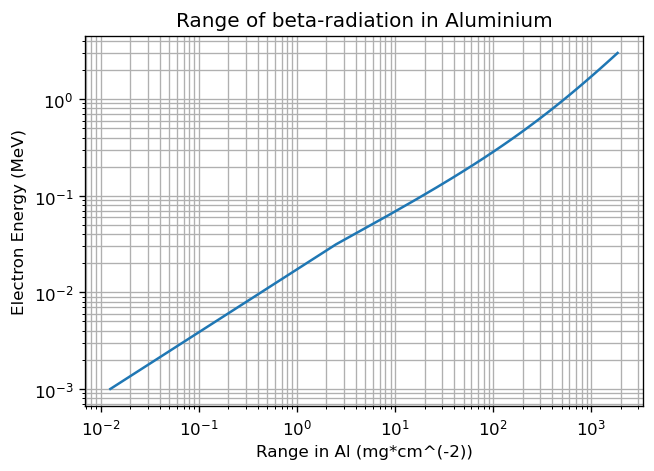

In [5]:
E = np.linspace(0.001,3,100)
figure(figsize=(6,4),dpi=120)
plt.loglog(range(E),E)
plt.grid(True, which="both", ls="-")
plt.ylabel("Electron Energy (MeV)")
plt.xlabel("Range in Al (mg*cm^(-2))")
plt.title("Range of beta-radiation in Aluminium")
plt.show()

### 3.1 Graphiken


In [6]:
# Graphiken 
#table.plot(x="Time (s)",y="Gyroscope x (rad/s)")

### 3.2 Berechnungen der Resultate

In [7]:
## Beispiel Vorversuch,  Gravitationskonstante

# Periode T
T = tn/n

# Gravitationskonstante
g = L * (2*np.pi/T)**2

### Resultate

In [8]:
print("Berechnete Gravitationskonstante g = ({:P}) m/^2".format(g))

Berechnete Gravitationskonstante g = (10.2±0.5) m/^2


### 3.2 Bestimmung der Genauigkeit

- Welche Messfehler wurden angenommen? Warum?
- Ausführung der Fehlerrechnung, falls nicht mit ufloat berechnet

## 4. Bewertung und Einordnung der Ergebnisse

**Je nach Ergebnis:**

- Sind die Ergebnisse realistisch? Warum (nicht)? Vergleich mit Theorie?
- Was sind die Hauptgründe für die Fehler eurer Ergebnisse und wie kommen sie zustande?
- Wie würdet ihr versuchen, diese weiter zu verringern.
- Wenn ihr den Versuch wiederholen würdet, was würdet ihr anders machen und warum?
- Wie könnte man die Genauigkeit des Versuchs verbessern?

**Anmerkung: Bitte das Messblatt mit abgeben, wenn beim Protokollieren der Messwerte benutzt wurde.**

In [19]:
from pynverse import inversefunc
def energy(R):
    return inversefunc(range, y_values=R, domain=[0.01, 1000])

In [20]:
energy(0.1)

ValueError: Requested values [0.1] lower than the lower limit 0.339598 of the image

In [17]:
inversefunc(range, y_values=1.0, domain=[0.01, 1000])

array(0.01870711)